In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#In this not book we are going to analyse when the busiest times of the year are to visit Seattle
#First we will load in the data to a pandas dataframe
#next filtering out unneeded columns and select for the year 2015, then add a month column
#We then create a new dataframe that is the count of reviews by month
#Finally we display this information in a graph

In [2]:
#Loading in the data
reviews_df = pd.read_csv('../Data/reviews.csv',parse_dates=['date'])
#Grab only the needed columns
rev = reviews_df[['listing_id','date']]
#Filering for only 2015 as this is the most recent, complete year in the data
rev = rev[rev['date'].dt.year == 2015]
#add a column for which month it is
rev['Month'] = rev['date'].dt.strftime('%b')

In [3]:
#Creating a new dataframe to make the graph from
rev_freq = pd.DataFrame(rev['Month'].value_counts().values,
                        index=rev['Month'].value_counts().index,
                        columns=['num_of_reviews'])

rev_freq.index.name = 'Month'

#Rearranging the ordedr to be chronological 
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
rev_freq = rev_freq.reindex(new_order, axis=0)

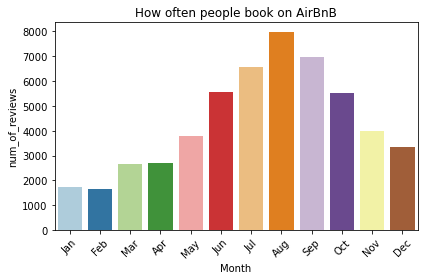

In [4]:
#Creating a boxplot to display the results
sns.barplot(x=rev_freq.index,y=rev_freq.num_of_reviews,palette='Paired');

plt.title('How often people book on AirBnB');
plt.xticks(rotation=45);
plt.tight_layout()
plt.savefig('Seattle_time_review.png',dpi=300)
plt.savefig('Seattle_time_review_jpg.jpg',dpi=300)